In [295]:
# Python Project Template

# 1. Prepare Problem 

# a) Load libraries 
# b) Load dataset

# 2. Summarize Data 

# a) Descriptive statistics 
# b) Data visualizations

# 3. Prepare Data

# a) Data Cleaning 
# b) Feature Selection 
# c) Data Transforms

# 4. Evaluate Algorithms 

# a) Split-out validation dataset 
# b) Test options and evaluation metric 
# c) Spot Check Algorithms 
# d) Compare Algorithms

# 5. Improve Accuracy

# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model 

# a) Predictions on validation dataset 
# b) Create standalone model on entire training dataset 
# c) Save model for later use


###  Prepare Problem 

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [297]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df=pd.read_csv("Desktop\\pima-indians-diabetes.csv",names=names)


## summarise data

In [298]:
df.shape

(768, 9)

In [299]:
df.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [300]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [301]:
print(df.groupby('class').size())

class
0    500
1    268
dtype: int64


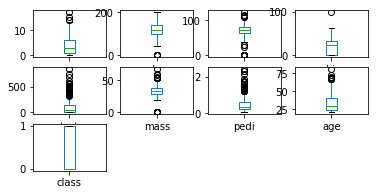

In [302]:
df.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

('LR', 0.7695146958304853, 0.04841051924567195)
('LDA', 0.773462064251538, 0.05159180390446138)
('KNN', 0.7265550239234451, 0.06182131406705549)
('CART', 0.6900205058099795, 0.06132974330819918)
('NB', 0.7551777170198223, 0.04276593954064409)
('SVM', 0.6510252904989747, 0.07214083485055327)


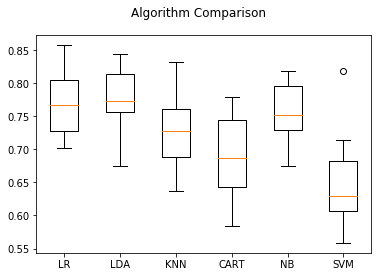

In [303]:
#compare algorithm
import pandas as pd 
from matplotlib import pyplot 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 

# load dataset 


array = df.values
X = array[:,0:8]
Y = array[:,8]

# prepare models 
models = [] 
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC())) 
# evaluate each model in turn
results = [] 
names = [] 
scoring = 'accuracy' 

for name, model in models: 
    kfold = KFold(n_splits=10, random_state=7) 
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg =(name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison 
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()


### Data Preparation and Modeling Pipeline

In [304]:
# Create a pipeline that standardizes the data then creates a model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

array=df.values
X=array[:,0:8]
Y=array[:,8]
# create pipeline

estimators=[]

estimators.append(('standardise',StandardScaler()))
estimators.append(('LDA',LinearDiscriminantAnalysis()))
model=Pipeline(estimators)

# evaluate pipeline

kfolds=KFold(n_splits=10,random_state=7)
results=cross_val_score(model,X,Y,cv=kfolds)

print(results.mean())


0.773462064251538


### Feature Extraction and Modeling Pipeline

In [305]:
# Create a pipeline that extracts features from the data then creates a model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

array=df.values
X=array[:,0:8]
Y=array[:,8]

#create feature union
features=[]

features.append(('Pca',PCA(n_components=3)))
features.append(('select_best',SelectKBest(k=6)))
feature_union=FeatureUnion(features)
                
# create pipeline

estimators=[]
estimators.append(('feature_union',feature_union))
estimators.append(('logistic',LogisticRegression()))
model=Pipeline(estimators)
                
# evaluate pipeline
                
kfolds=KFold(n_splits=10,random_state=7)
results=cross_val_score(model,X,Y,cv=kfolds)

print(results.mean())



0.7760423786739576


## Improve Performance with Ensembles

### Bagging Algorithms

In [306]:
# Bagged Decision Trees for Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

array-df.values
X=array[:,0:8]
Y=array[:,8]

seed=7
kfolds=KFold(n_splits=10,random_state=seed)
cart=DecisionTreeClassifier()

n_tree=100

model=BaggingClassifier(base_estimator=cart,n_estimators=n_tree,random_state=seed)
results=cross_val_score(model,X,Y,cv=kfolds)

print(results.mean())


0.770745044429255


### Random Forest

In [307]:
# Random Forest Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

array=df.values
X=array[:,0:8]
Y=array[:,8]

seed=7

kfolds=KFold(n_splits=10,random_state=seed)
n_tree=100
max_features=3

model=RandomForestClassifier(n_estimators=n_tree,max_features=max_features)

results=cross_val_score(model,X,Y,cv=kfolds)

print(results.mean())


0.7746582365003418


### Extra Trees

In [308]:
# Extra Trees Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier

array=df.values
X=array[:,0:8]
Y=array[:,8]

seed=7
n_tree=100
max_features=7

kfolds=KFold(n_splits=10,random_state=seed)
model=ExtraTreesClassifier(n_estimators=n_tree,max_features=max_features)
results=cross_val_score(model,X,Y,cv=kfolds)

print(results.mean())

0.7655331510594668


##  Boosting Algorithms

### AdaBoost

In [309]:
# AdaBoost Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier

array=df.values
X=array[:,0:8]
Y=array[:,8]

n_tree=20
seed=7

kfolds=KFold(n_splits=10,random_state=seed)
model=AdaBoostClassifier(n_estimators=n_tree,random_state=seed)

results=cross_val_score(model,X,Y,cv=kfolds)

print(results.mean())

0.7630553656869448


### Stochastic Gradient Boosting

In [310]:
# Stochastic Gradient Boosting Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

array=df.values
X=array[:,0:8]
Y=array[:,8]

seed=7
n_tree=100

kfolds=KFold(n_splits=10,random_state=seed)
model=GradientBoostingClassifier(n_estimators=n_tree,random_state=seed)
results=cross_val_score(model,X,Y,cv=kfolds)
print(results.mean())

0.7669002050580999


### Voting Ensemble

In [311]:
# Voting Ensemble for Classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

array=df.values
X-array[:,0:8]
Y=array[:,8]

kfolds=KFold(n_splits=10,random_state=7)
# create the sub models

estimators=[]
model1=LogisticRegression()
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))

# create the ensemble model

ensemble=VotingClassifier(estimators)

results=cross_val_score(ensemble,X,Y,cv=kfolds)

print(results.mean())


C:\Users\v-trilp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\v-trilp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\v-trilp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\v-trilp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\

0.7265208475734791


C:\Users\v-trilp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Improve Performance with Algorithm Tuning


### Grid Search Parameter Tuning

In [312]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

array=df.values
X=array[:,0:8]
Y=array[:,8]
alphas=np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid=dict(alpha=alphas)
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,Y)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.27961755931297233
1.0


### Random Search Parameter Tuning

In [313]:
# Randomized for Algorithm Tuning

import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

array=df.values
X=array[:,0:8]
Y=array[:,8]

alphas=np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid={'alpha':uniform()}
model=Ridge()

rsearch=RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=100,random_state=7)
rsearch.fit(X,Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)


0.27961712703051095
0.9779895119966027


## Save and Load Machine Learning Models

### Finalize Your Model with pickle

In [314]:
# Save Model Using Pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

array=df.values
X=array[:,0:8]
Y=array[:,8]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=7)

model=LogisticRegression()
model.fit(X_train,Y_train)

filename='finalized_model.sav'
dump(model,open(filename,'wb'))


loaded_model=load(open(filename,'rb'))
result=loaded_model.score(X_test,Y_test)
print(result)


0.7559055118110236


### Finalize Your Model with Joblib

In [315]:
# Save Model Using joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

array=df.values
X=array[:,0:8]
Y=array[:,8]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=7)
model=LogisticRegression()
model.fit(X_train,Y_train)

filename1='finalized_model.sav'
dump(model,filename1)

['finalized_model.sav']

In [316]:
loaded_model=load(filename1)
result=loaded_model.score(X_test,Y_test)
print(result)

0.7559055118110236
